In [61]:
from tensorflow import keras
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [62]:
(x_train,_),(x_test,_)=mnist.load_data()

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [65]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

In [66]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

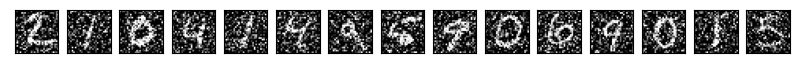

In [67]:
n = 15
plt.figure(figsize=(10, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [78]:
input_img = keras.Input(shape=(28, 28, 1))
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=layers.MaxPooling2D((2,2),padding='same')(x)

In [84]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [89]:
autoencoder=keras.Model(input_img,decoded)
print("Name : YUVARAJ S\nRegister Number : 212222240119")
autoencoder.summary()

Name : YUVARAJ S
Register Number : 212222240119
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_52

In [101]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=autoencoder.fit(
    x_train_noisy,x_train_scaled,
    epochs=3,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy,x_test_scaled)
)

Epoch 1/3
469/469 [==============================] - 23s 46ms/step - loss: 0.1008 - accuracy: 0.8129 - val_loss: 0.0994 - val_accuracy: 0.8117
Epoch 2/3
469/469 [==============================] - 23s 50ms/step - loss: 0.0997 - accuracy: 0.8130 - val_loss: 0.0984 - val_accuracy: 0.8123
Epoch 3/3
469/469 [==============================] - 25s 53ms/step - loss: 0.0989 - accuracy: 0.8131 - val_loss: 0.0979 - val_accuracy: 0.8123


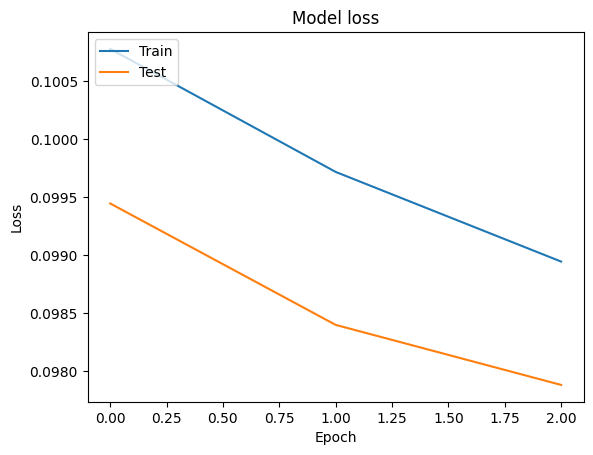

In [102]:
#plot loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [103]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 2s 5ms/step


Name : YUVARAJ S
Register Number : 212222240119


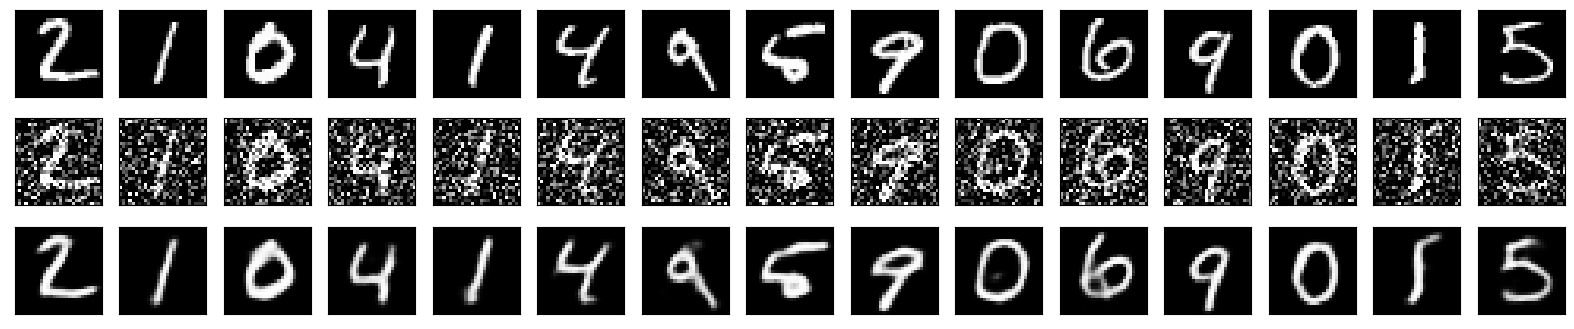

In [104]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
print("Name : YUVARAJ S\nRegister Number : 212222240119")
plt.show()